In [63]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
cvr = 0.03 #conversion metric
mde = np.arange(0.1,1,0.1) #MDE for relative difference 0.1 - 0.9
alpha = 0.05 #alpha or significance level
power = 0.8 #statistical power
n_variant = 2
daily_traffic = 1000

In [77]:
stde = cvr*(1-cvr)
sample_per_variant = []

for mde_i in mde:
    delta = cvr*mde_i
    sample_per_variant.append((2*(norm.ppf(1 - alpha/2) + norm.ppf(power))**2)/(delta**2/stde))
    
duration_days = [i/daily_traffic for i in sample_per_variant]

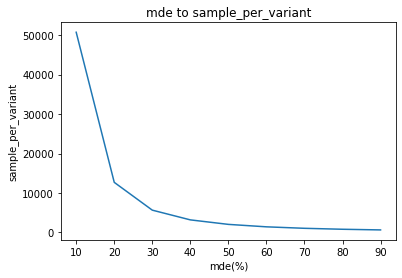

In [86]:
sns.lineplot(x=mde*100,y=sample_per_variant)
plt.title('mde to sample_per_variant')
plt.xlabel('mde(%)')
plt.ylabel('sample_per_variant')
plt.show()

In [83]:
result = pd.DataFrame({'mde(%)':mde*100,
              'sample_per_variant':np.ceil(sample_per_variant),
              'duration_days':np.ceil(duration_days)})

result

,mde(%),sample_per_variant,duration_days
0,10.0,50757.0,51.0
1,20.0,12690.0,13.0
2,30.0,5640.0,6.0
3,40.0,3173.0,4.0
4,50.0,2031.0,3.0
5,60.0,1410.0,2.0
6,70.0,1036.0,2.0
7,80.0,794.0,1.0
8,90.0,627.0,1.0
